In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r'E:\DUK\ML\Heart Disease Prediction\Heart_Dataset.csv')
print("\nFirst 5 rows of the dataset:", data.head())


First 5 rows of the dataset:    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0   

In [6]:
display(data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [13]:
# Drop 'education' as it's not directly related to heart disease prediction
data = data.drop('education', axis=1)
print(data.head())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB
None


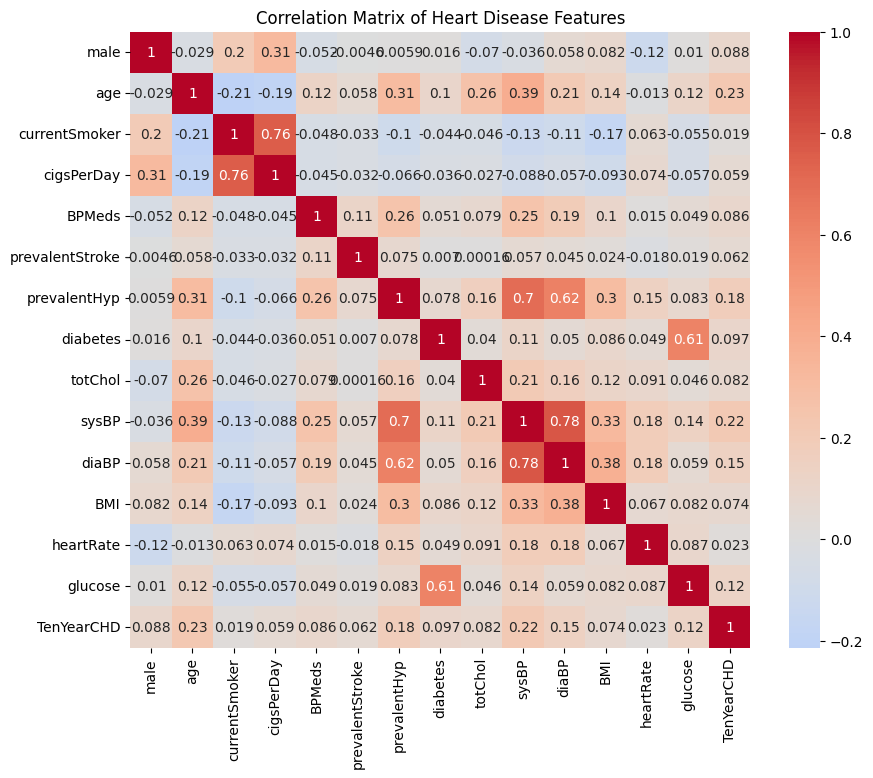

In [16]:
# Plotting the correlation heatmap again for clarity
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()

# Use a diverging color palette to make correlations clearer
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

In [17]:
# Get the correlation matrix
correlation_matrix = data.corr()
# Display the correlation matrix
print(correlation_matrix)

                     male       age  currentSmoker  cigsPerDay    BPMeds  \
male             1.000000 -0.029014       0.197026    0.314849 -0.051544   
age             -0.029014  1.000000      -0.213662   -0.192017  0.121011   
currentSmoker    0.197026 -0.213662       1.000000    0.760326 -0.048348   
cigsPerDay       0.314849 -0.192017       0.760326    1.000000 -0.044697   
BPMeds          -0.051544  0.121011      -0.048348   -0.044697  1.000000   
prevalentStroke -0.004550  0.057679      -0.032980   -0.032248  0.114614   
prevalentHyp     0.005853  0.306799      -0.103710   -0.065541  0.258580   
diabetes         0.015693  0.101314      -0.044285   -0.036173  0.051407   
totChol         -0.069643  0.260527      -0.046391   -0.027134  0.078642   
sysBP           -0.035879  0.394053      -0.130281   -0.088393  0.251479   
diaBP            0.058199  0.205586      -0.107933   -0.056768  0.192254   
BMI              0.081852  0.135470      -0.167368   -0.092647  0.099617   
heartRate   

In [18]:
# Get highly correlated pairs (absolute correlation > 0.9)
high_correlation_pairs = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1)]
# Display the result
print(high_correlation_pairs)

                 male  age  currentSmoker  cigsPerDay  BPMeds  \
male              NaN  NaN            NaN         NaN     NaN   
age               NaN  NaN            NaN         NaN     NaN   
currentSmoker     NaN  NaN            NaN         NaN     NaN   
cigsPerDay        NaN  NaN            NaN         NaN     NaN   
BPMeds            NaN  NaN            NaN         NaN     NaN   
prevalentStroke   NaN  NaN            NaN         NaN     NaN   
prevalentHyp      NaN  NaN            NaN         NaN     NaN   
diabetes          NaN  NaN            NaN         NaN     NaN   
totChol           NaN  NaN            NaN         NaN     NaN   
sysBP             NaN  NaN            NaN         NaN     NaN   
diaBP             NaN  NaN            NaN         NaN     NaN   
BMI               NaN  NaN            NaN         NaN     NaN   
heartRate         NaN  NaN            NaN         NaN     NaN   
glucose           NaN  NaN            NaN         NaN     NaN   
TenYearCHD        NaN  Na

In [19]:
print(data.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [20]:
# Handling missing values (without inplace=True)
# For continuous features, use median imputation
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['glucose'] = data['glucose'].fillna(data['glucose'].median())

# Checking for any remaining missing values
print(data.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [21]:
print(data.describe())

              male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4240.000000  4240.000000    4240.000000  4240.000000  4240.000000   
mean      0.429245    49.580189       0.494104     8.944340     0.029245   
std       0.495027     8.572942       0.500024    11.904777     0.168513   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      4240.000000   4240.000000  4240.000000  4240.000000  4240.000000   
mean          0.005896      0.310613     0.025708   236.667689   132.354599   
std           0.076569      0.462799     0.158280    44.328480    22.033300   

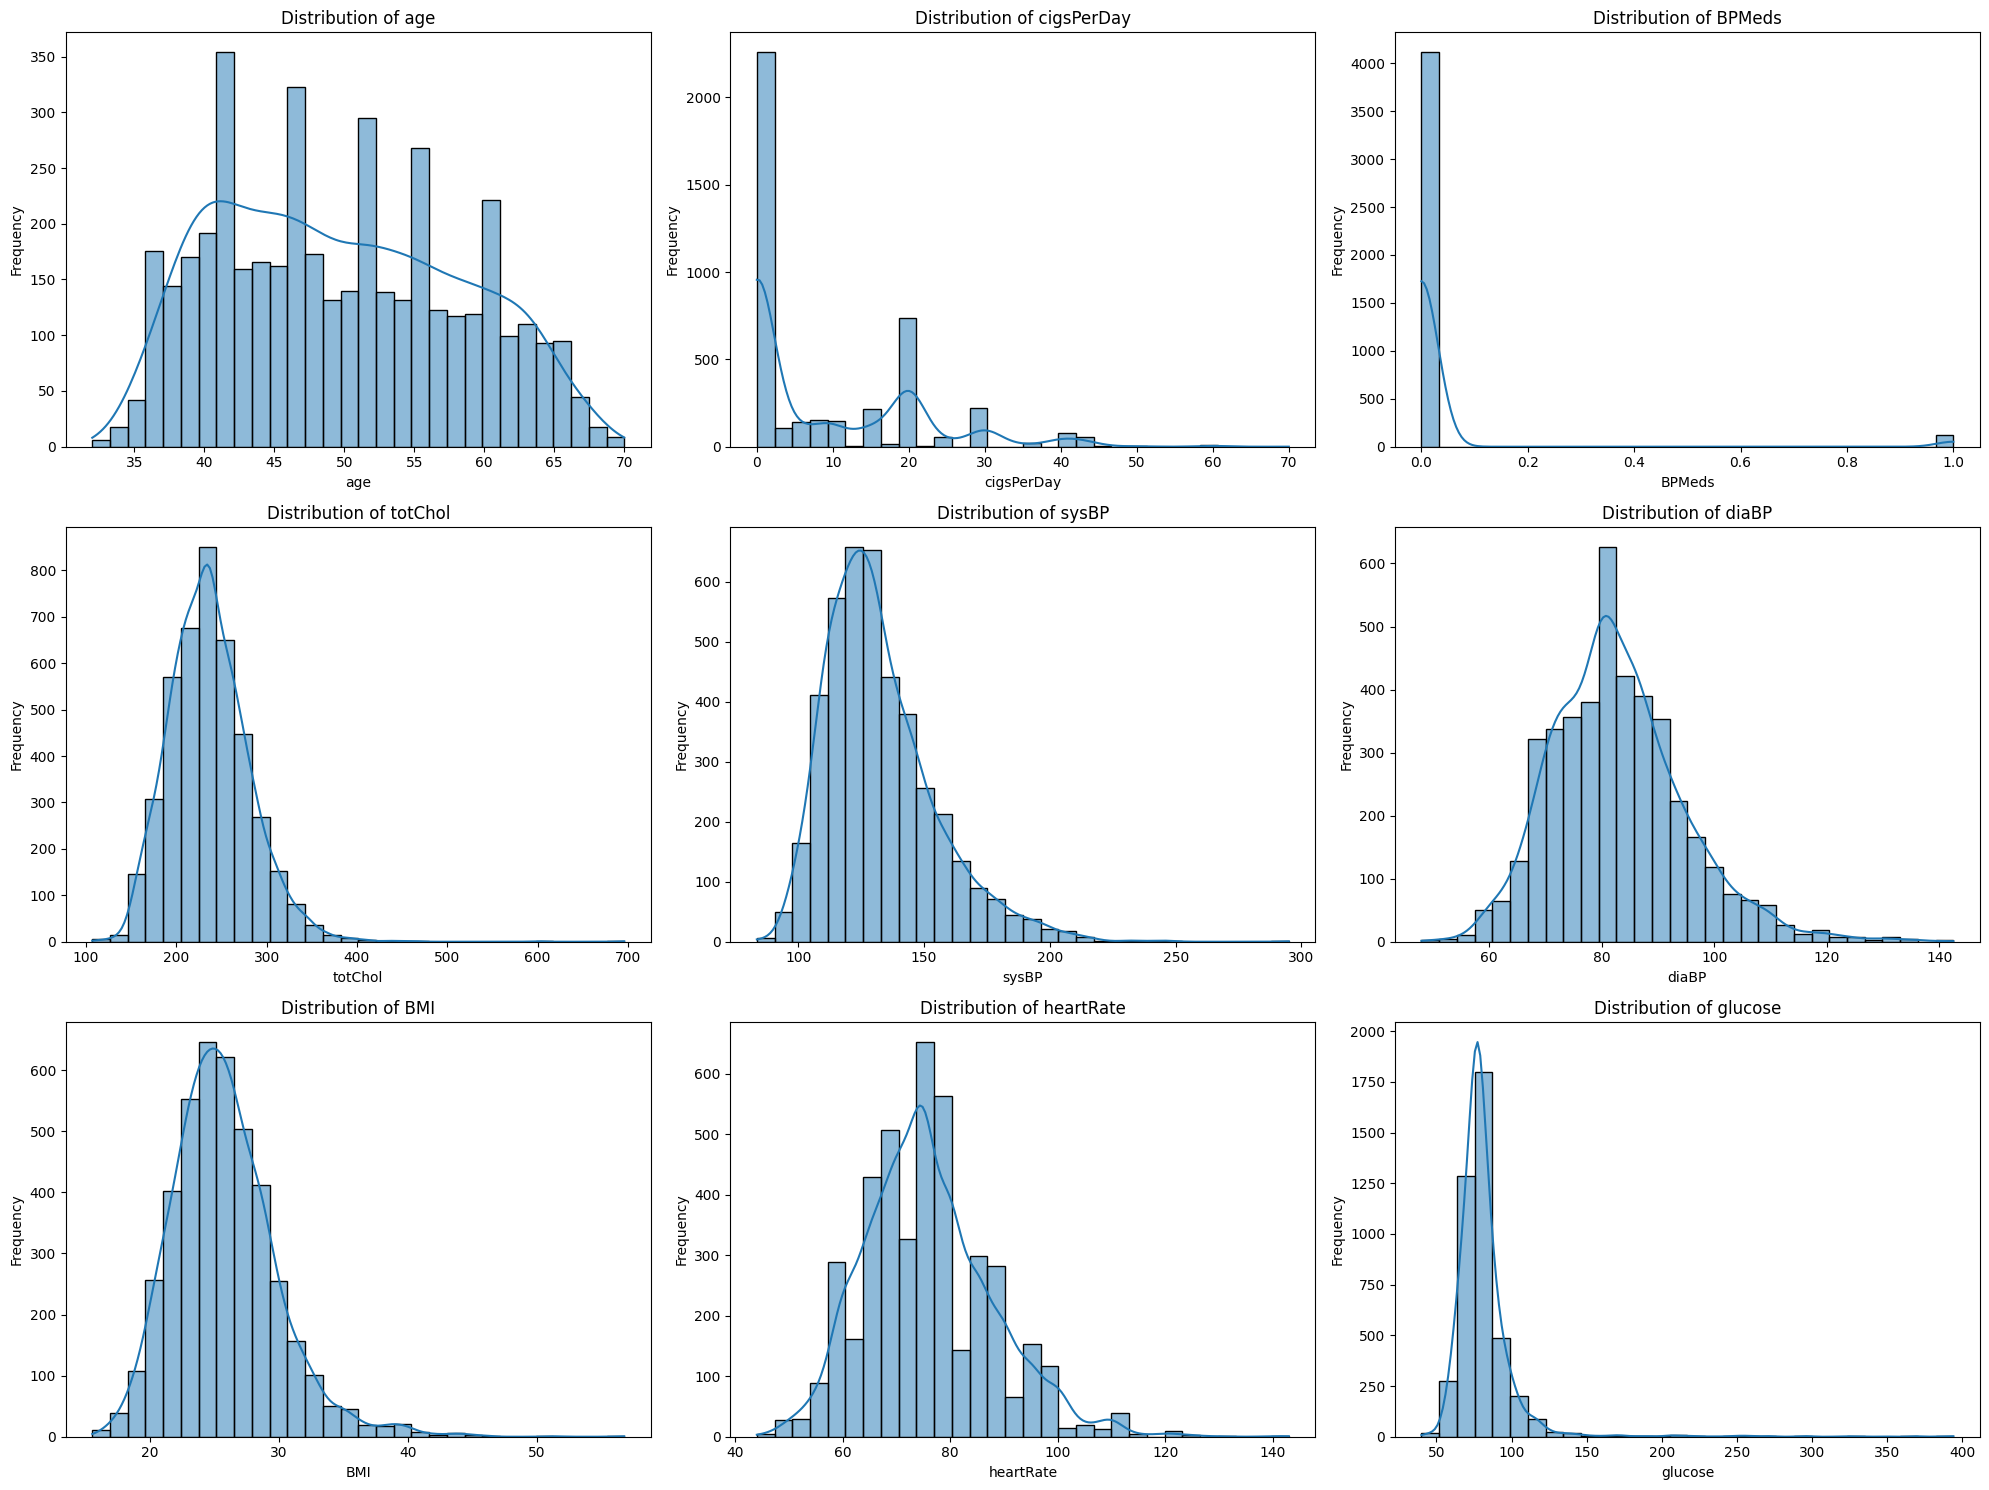

In [22]:
# Set the figure size
plt.figure(figsize=(20, 15))

# List of continuous features
continuous_features = ['age', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create subplots for continuous features
for i, feature in enumerate(continuous_features):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of plots
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

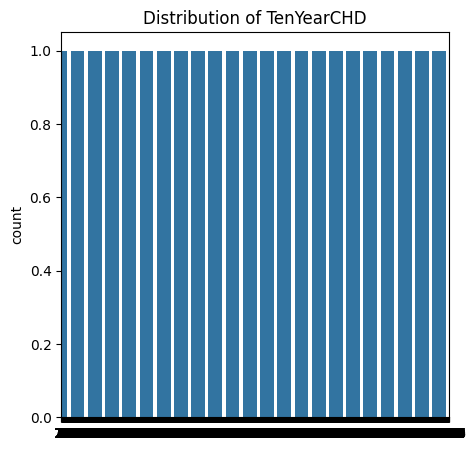

In [23]:
# Checking the distribution of the target variable (TenYearCHD)
plt.figure(figsize=(5, 5))
sns.countplot(data['TenYearCHD'])
plt.title('Distribution of TenYearCHD')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
x = ['male', 'age', 'currentSmoker', 'cigsPerDay', 
            'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 
            'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
y = 'TenYearCHD'

In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[x], data[y], test_size=0.2, random_state=42)

In [32]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Lasso Regression': Lasso(alpha=0.01, max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
# Store the results
model_performance = {}

In [36]:
# Train, predict, and evaluate each model
for name, model in models.items():
    if name == 'Lasso Regression':
        # Lasso is for regression, so we round predictions for classification
        model.fit(X_train_scaled, y_train)
        y_pred = np.round(model.predict(X_test_scaled))
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy * 100
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression:
Accuracy: 85.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.53      0.07      0.13       123

    accuracy                           0.86       848
   macro avg       0.70      0.53      0.53       848
weighted avg       0.81      0.86      0.81       848

Confusion Matrix:
[[717   8]
 [114   9]]

Lasso Regression:
Accuracy: 85.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       1.00      0.01      0.02       123

    accuracy                           0.86       848
   macro avg       0.93      0.50      0.47       848
weighted avg       0.88      0.86      0.79       848

Confusion Matrix:
[[725   0]
 [122   1]]

Decision Tree:
Accuracy: 76.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.8

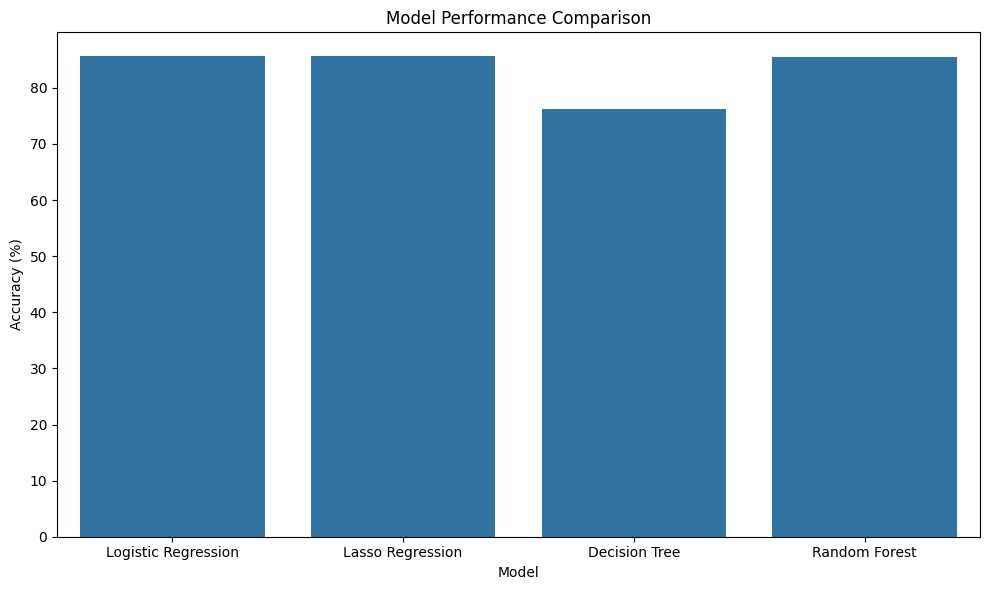

In [38]:
# Comparison of model performance
performance_df = pd.DataFrame(list(model_performance.items()), columns=['Model', 'Accuracy'])

# Plotting the model performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

In [39]:
# Prediction with user input using the best-performing model (you can change this based on model performance)
best_model = LogisticRegression()
best_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
# Define the column names based on the features used in the model
column_names = ['male', 'age', 'currentSmoker', 'cigsPerDay', 
                'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 
                'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

def predict_heart_disease():
    print("\nPlease provide the following details to predict the 10-year CHD risk:")
    male = int(input("Male (1 for Yes, 0 for No): "))
    age = int(input("Age: "))
    currentSmoker = int(input("Current Smoker (1 for Yes, 0 for No): "))
    cigsPerDay = float(input("Cigarettes per day: "))
    BPMeds = int(input("Taking BP meds (1 for Yes, 0 for No): "))
    prevalentStroke = int(input("Previous stroke (1 for Yes, 0 for No): "))
    prevalentHyp = int(input("Hypertension (1 for Yes, 0 for No): "))
    diabetes = int(input("Diabetes (1 for Yes, 0 for No): "))
    totChol = float(input("Total Cholesterol level: "))
    sysBP = float(input("Systolic BP: "))
    diaBP = float(input("Diastolic BP: "))
    BMI = float(input("BMI: "))
    heartRate = float(input("Heart Rate: "))
    glucose = float(input("Glucose level: "))

    # Creating a DataFrame for the input
    input_data = pd.DataFrame([[male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, 
                                diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose]], 
                              columns=column_names)

    # Standardize the input
    input_data_scaled = scaler.transform(input_data)

    # Prediction
    prediction = best_model.predict(input_data_scaled)

    if prediction[0] == 1:
        print("\nThe model predicts that the person is at risk of heart disease within 10 years.")
    else:
        print("\nThe model predicts that the person is not at risk of heart disease within 10 years.")

# Call the function for prediction
predict_heart_disease()


Please provide the following details to predict the 10-year CHD risk:


Male (1 for Yes, 0 for No):  0
Age:  43
Current Smoker (1 for Yes, 0 for No):  0
Cigarettes per day:  0
Taking BP meds (1 for Yes, 0 for No):  1
Previous stroke (1 for Yes, 0 for No):  0
Hypertension (1 for Yes, 0 for No):  1
Diabetes (1 for Yes, 0 for No):  1
Total Cholesterol level:  148
Systolic BP:  125
Diastolic BP:  85
BMI:  23
Heart Rate:  75
Glucose level:  136



The model predicts that the person is not at risk of heart disease within 10 years.
